#Árvore de Decisão

## Importando os Dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Carregando o conjunto de dados
file_path = '/content/drive/MyDrive/TCC - Mateus Paiva/Datasets/nba_games.csv'
nba_data = pd.read_csv(file_path)

# Exibindo as primeiras linhas do conjunto de dados para compreensão da estrutura e colunas
nba_data.head()

,SEASON,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,2001,1610612739,CLE,Cleveland Cavaliers,20100001,2001-10-30,CLE vs. BOS,0,240,39,90,0.433,3,17,0.176,8,10,0.800,7,29,36,30,3,8,14,21,89,-19
1,2001,1610612762,UTA,Utah Jazz,20100009,2001-10-30,UTA vs. MIL,0,265,43,81,0.531,5,16,0.313,21,25,0.840,11,30,41,36,8,4,21,24,112,-7
2,2001,1610612757,POR,Portland Trail Blazers,20100012,2001-10-30,POR @ LAL,0,240,31,73,0.425,4,12,0.333,21,27,0.778,5,37,42,17,10,7,15,28,87,-11
3,2001,1610612745,HOU,Houston Rockets,20100007,2001-10-30,HOU vs. ATL,1,265,33,84,0.393,4,18,0.222,19,28,0.679,14,38,52,17,10,5,18,21,89,5
4,2001,1610612737,ATL,Atlanta Hawks,20100007,2001-10-30,ATL @ HOU,0,265,30,83,0.361,3,14,0.214,21,27,0.778,10,37,47,15,10,8,17,26,84,-5


## Modelo de Machine Learning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Lista de equipes e temporadas únicas no conjunto de dados
unique_teams = nba_data['TEAM_NAME'].unique()
unique_seasons = nba_data['SEASON'].unique()

In [5]:
# Lista para armazenar os resultados
results_by_team_season = []

In [6]:
# Loop pelas equipes e temporadas
for team in unique_teams:
    for season in unique_seasons:
        # Filtrando dados para a equipe e temporada específica
        team_season_data = nba_data[(nba_data['TEAM_NAME'] == team) & (nba_data['SEASON'] == season)]

        # Verificando se existem dados para a combinação de equipe e temporada
        if not team_season_data.empty:
            # Preparando as características e o alvo
            X = team_season_data.drop(columns=['SEASON', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'PLUS_MINUS'], axis=1)
            y = team_season_data['WL']

            # Dividindo os dados em conjuntos de treinamento e teste
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

            # Treinando o modelo de árvore de decisão
            dtree = DecisionTreeClassifier(random_state=42)
            dtree.fit(X_train, y_train)

            # Avaliando o modelo no conjunto de teste
            predictions = dtree.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)

            # Armazenando a acurácia e a característica mais importante
            feature_importances = dtree.feature_importances_
            top_feature_index = feature_importances.argmax()
            top_feature_name = X.columns[top_feature_index]
            top_feature_importance = feature_importances[top_feature_index]

            results_by_team_season.append({
                'TEAM': team,
                'SEASON': str(season),
                'ACCURACY': round(accuracy, 2),
                'TOP_FEATURE': top_feature_name,
                'IMPORTANCE': round(top_feature_importance, 2)
            })

In [7]:
# Convertendo os resultados em um DataFrame, ordenando e resetando o índice
results_df = pd.DataFrame(results_by_team_season).sort_values(by=['SEASON', 'TEAM']).reset_index(drop=True)
results_df.to_csv("nba_decision_tree.csv", index=False)
results_df

,TEAM,SEASON,ACCURACY,TOP_FEATURE,IMPORTANCE
0,Atlanta Hawks,2001,0.64,FG_PCT,0.49
1,Boston Celtics,2001,0.68,FG_PCT,0.24
2,Brooklyn Nets,2001,0.61,FG_PCT,0.42
3,Charlotte Hornets,2001,0.57,FG_PCT,0.21
4,Chicago Bulls,2001,0.79,FTM,0.23
...,...,...,...,...,...
682,Sacramento Kings,2023,0.57,FG_PCT,0.27
683,San Antonio Spurs,2023,0.71,FG_PCT,0.43
684,Toronto Raptors,2023,0.79,REB,0.28
685,Utah Jazz,2023,0.64,AST,0.38


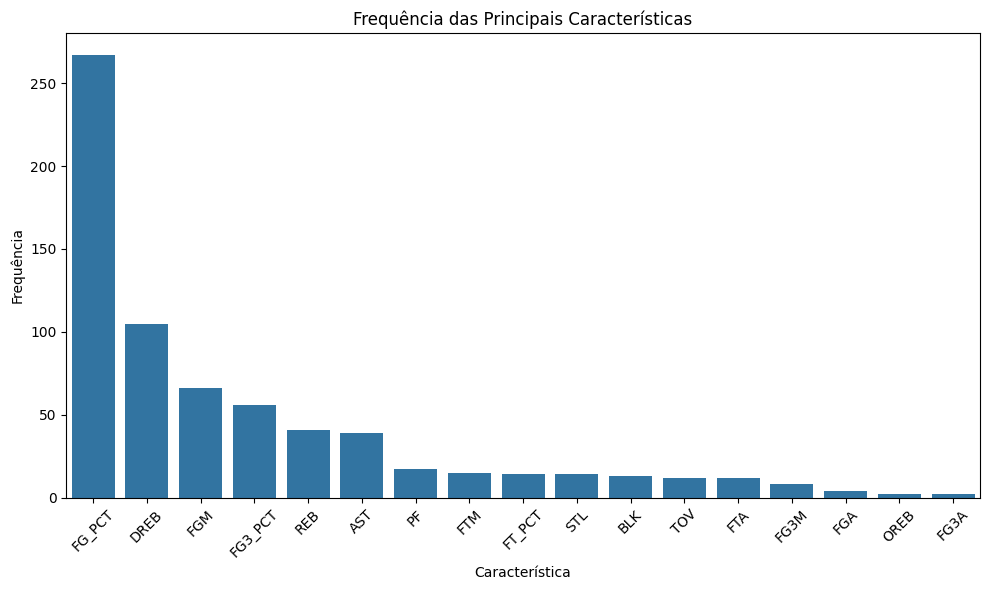

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculando a frequência das principais características
top_feature_frequency = results_df['TOP_FEATURE'].value_counts().reset_index()
top_feature_frequency.columns = ['TOP_FEATURE', 'FREQUENCY']

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='TOP_FEATURE', y='FREQUENCY', data=top_feature_frequency)
plt.xticks(rotation=45)
plt.title('Frequência das Principais Características')
plt.xlabel('Característica')
plt.ylabel('Frequência')
plt.tight_layout()

# Salve o gráfico se desejar, por exemplo:
plt.savefig('frequency_decision_tree.png')

# Mostrando o gráfico
plt.show()

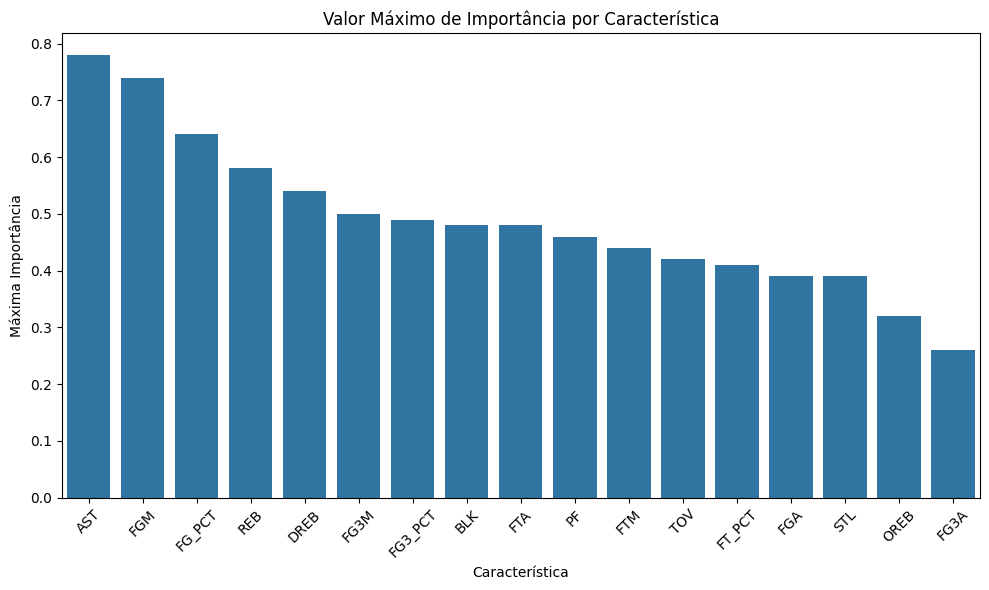

In [9]:
# Calculando o valor máximo de importância para cada característica principal
max_importance_by_feature = results_df.groupby('TOP_FEATURE')['IMPORTANCE'].max().reset_index()

# Ordenando os dados pelo valor máximo de importância
max_importance_by_feature_sorted = max_importance_by_feature.sort_values('IMPORTANCE', ascending=False)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='TOP_FEATURE', y='IMPORTANCE', data=max_importance_by_feature_sorted)
plt.xticks(rotation=45)
plt.title('Valor Máximo de Importância por Característica')
plt.xlabel('Característica')
plt.ylabel('Máxima Importância')
plt.tight_layout()

# Salve o gráfico se desejar, por exemplo:
plt.savefig('max_importance_decision_tree.png')

# Mostrando o gráfico
plt.show()